<a href="https://colab.research.google.com/github/manash059/heart-disease-2025/blob/main/AD_04_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
##install the modules
!pip install streamlit

In [97]:
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,confusion_matrix

In [98]:
df=pd.read_csv('/content/Heart_Disease_Dataset.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,No,48.02,No,No,Yes,13,17,No,Female,45-49,White,"No, borderline diabetes",No,Fair,6.4,Yes,No,No
100197,Yes,82.88,No,No,No,29,23,No,Male,75-79,Other,"No, borderline diabetes",Yes,Very good,18.9,Yes,Yes,No
100198,No,39.46,No,Yes,Yes,23,6,Yes,Male,80 or older,Hispanic,Yes,No,Excellent,18.5,Yes,No,Yes
100199,No,46.25,Yes,Yes,Yes,9,14,No,Male,25-29,American Indian/Alaskan Native,No,No,Very good,22.7,Yes,Yes,No


In [99]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes


In [100]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
100196,No,48.02,No,No,Yes,13,17,No,Female,45-49,White,"No, borderline diabetes",No,Fair,6.4,Yes,No,No
100197,Yes,82.88,No,No,No,29,23,No,Male,75-79,Other,"No, borderline diabetes",Yes,Very good,18.9,Yes,Yes,No
100198,No,39.46,No,Yes,Yes,23,6,Yes,Male,80 or older,Hispanic,Yes,No,Excellent,18.5,Yes,No,Yes
100199,No,46.25,Yes,Yes,Yes,9,14,No,Male,25-29,American Indian/Alaskan Native,No,No,Very good,22.7,Yes,Yes,No
100200,No,39.26,Yes,No,No,10,5,Yes,Female,25-29,Other,"No, borderline diabetes",Yes,Fair,4.1,No,No,Yes


In [101]:
df.shape

(100201, 18)

In [102]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,100201.000000,100201.000000,100201.000000,100201.000000
mean,53.373302,14.503937,14.498239,12.490389
std,23.878712,8.640423,8.658639,6.632122
min,12.020000,0.000000,0.000000,1.000000
25%,32.760000,7.000000,7.000000,6.700000
50%,53.380000,14.000000,15.000000,12.500000
75%,73.950000,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100201 entries, 0 to 100200
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      100201 non-null  object 
 1   BMI               100201 non-null  float64
 2   Smoking           100201 non-null  object 
 3   AlcoholDrinking   100201 non-null  object 
 4   Stroke            100201 non-null  object 
 5   PhysicalHealth    100201 non-null  int64  
 6   MentalHealth      100201 non-null  int64  
 7   DiffWalking       100201 non-null  object 
 8   Sex               100201 non-null  object 
 9   AgeCategory       100201 non-null  object 
 10  Race              100201 non-null  object 
 11  Diabetic          100201 non-null  object 
 12  PhysicalActivity  100201 non-null  object 
 13  GenHealth         100201 non-null  object 
 14  SleepTime         100201 non-null  float64
 15  Asthma            100201 non-null  object 
 16  KidneyDisease     10

In [104]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [105]:
df.duplicated().sum()

0

In [106]:
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [107]:
print(df.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [108]:
print(df.nunique())

HeartDisease           2
BMI                 8284
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        30
MentalHealth          30
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime            231
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


In [109]:
df.count()

,0
HeartDisease,100201
BMI,100201
Smoking,100201
AlcoholDrinking,100201
Stroke,100201
PhysicalHealth,100201
MentalHealth,100201
DiffWalking,100201
Sex,100201
AgeCategory,100201


In [110]:
for columname in df.columns:
    print(df[columname].value_counts())

HeartDisease
Yes    50134
No     50067
Name: count, dtype: int64
BMI
56.38    26
91.47    26
27.95    26
88.49    26
66.39    25
         ..
23.75     3
29.15     3
65.14     3
34.33     2
91.36     2
Name: count, Length: 8284, dtype: int64
Smoking
Yes    50445
No     49756
Name: count, dtype: int64
AlcoholDrinking
Yes    50435
No     49766
Name: count, dtype: int64
Stroke
Yes    50265
No     49936
Name: count, dtype: int64
PhysicalHealth
8     3430
20    3401
9     3395
16    3392
19    3386
13    3385
12    3377
26    3369
29    3363
15    3355
23    3354
22    3347
28    3345
14    3343
2     3341
1     3337
10    3334
11    3332
6     3329
0     3328
17    3327
7     3323
24    3316
5     3305
18    3301
3     3287
21    3285
27    3277
25    3270
4     3267
Name: count, dtype: int64
MentalHealth
27    3442
16    3442
13    3419
5     3403
26    3397
21    3394
22    3390
7     3382
2     3377
8     3376
1     3374
18    3367
14    3362
28    3361
6     3360
3     3357
20    3342
9

In [111]:
data= pd.get_dummies(df,columns=['Diabetic'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False


In [112]:
data= pd.get_dummies(df,columns=['Sex',"AgeCategory",'Race','GenHealth'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Yes,Yes,...,False,False,False,False,False,True,True,False,False,False
1,Yes,36.93,Yes,Yes,No,3,10,No,"No, borderline diabetes",Yes,...,False,False,False,True,False,False,False,False,True,False
2,No,18.70,Yes,No,Yes,26,15,No,No,No,...,False,False,False,True,False,False,False,False,True,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,"No, borderline diabetes",No,...,False,False,False,False,False,False,True,False,False,False
4,Yes,75.64,No,No,Yes,2,29,No,No,Yes,...,False,False,False,False,False,True,False,False,False,False


In [113]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['HeartDisease'], axis=1)
# Instead of mapping, use replace to handle potential unknown categories in 'HeartDisease' column
y = df['HeartDisease'].replace({"Yes": 1, "No": 0})

# Check if there are any values other than "Yes" and "No"
unknown_values = set(df['HeartDisease'].unique()) - {'Yes', 'No'}
if unknown_values:
    print(f"Warning: Unknown values found in 'HeartDisease' column: {unknown_values}")
    # Handle these values (e.g., impute, drop rows)

categorical_features = X.select_dtypes(include=['object']).columns

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
clf.fit(X_train, y_train)

<ipython-input-114-77595b3ba3af>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['HeartDisease'].replace({"Yes": 1, "No": 0})


DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.50
Precision: 0.50
Recall: 0.51
F1-Score: 0.50
AUC-ROC: 0.50


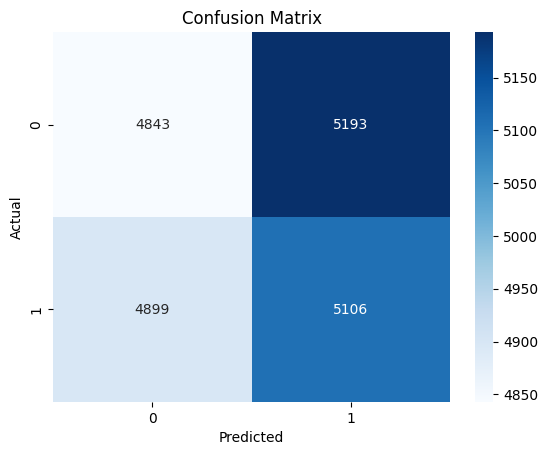

In [115]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()